In [32]:
# Data Exploratory Analysis of Cleaned Data



In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize





In [44]:
filename = '/Users/benedictzuzi/Documents/nlp_sentiment_analysis/data/imdb_dataset.csv'

df_init = pd.read_csv(filename)

df_init.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [74]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
    


In [98]:
from preprocess import preprocess

In [99]:
df = preprocess(filename)
df.head()

,review,sentiment,cleaned_review,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,..."


In [92]:
#check for missing values

df.isnull().sum()



review            0
sentiment         0
cleaned_review    0
tokens            0
dtype: int64

In [97]:
#inspect class balance

print(df['sentiment'].value_counts())

print(df['tokens'][0])

positive    25000
negative    25000
Name: sentiment, dtype: int64
['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt

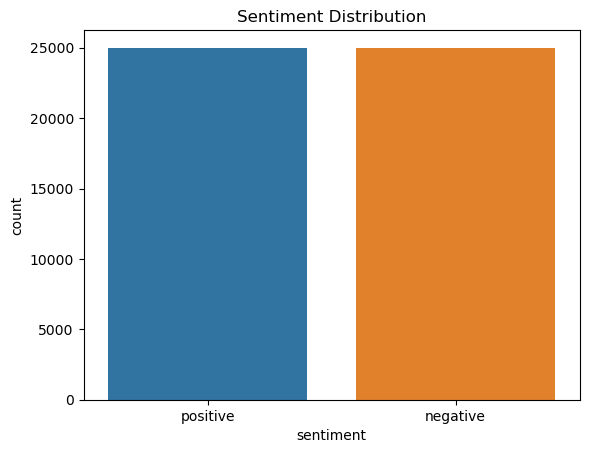

In [94]:
#visualize class distribution

sns.countplot(x="sentiment", data = df)
plt.title('Sentiment Distribution')
plt.show()

In [29]:
#assess most common words/tokens in reviews

all_tokens = [token for sublist in df['tokens'] for token in sublist] #flatten all token lists to one list

word_freq = Counter(all_tokens)

print(word_freq.most_common(10))

[('movie', 83578), ('film', 74514), ('one', 50392), ('like', 38834), ('good', 28502), ('even', 24285), ('would', 24001), ('time', 23299), ('really', 22900), ('see', 22437)]


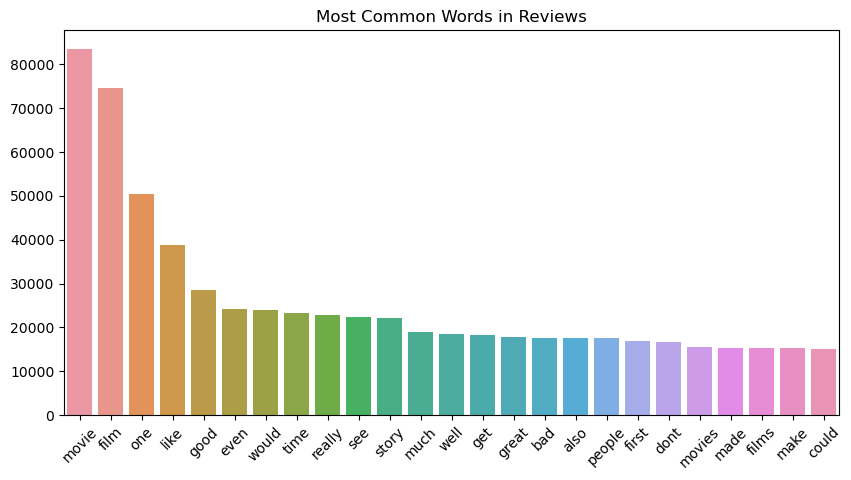

In [31]:
most_common_words = word_freq.most_common(25)

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words in Reviews')
plt.xticks(rotation=45)
plt.show()



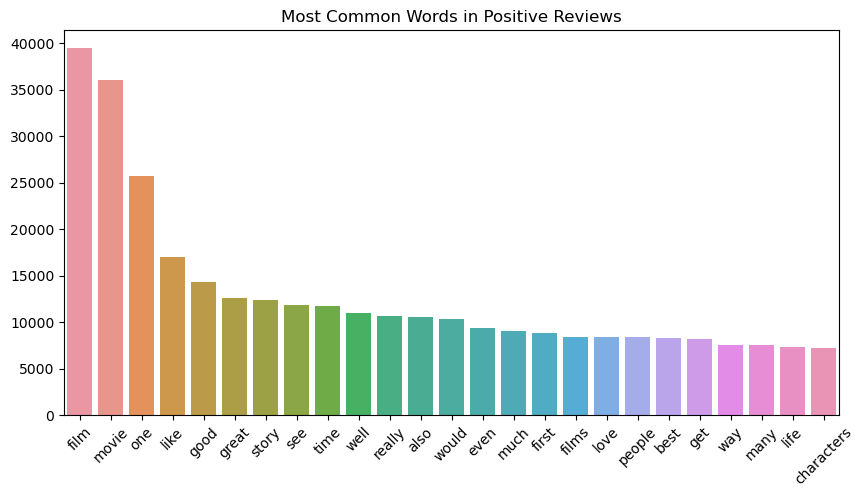

In [38]:
#most common tokens for positive reviews

pos_tokens = [token for sublist in df[df['sentiment'] == 'positive']['tokens'] for token in sublist] #flatten all token lists to one list

word_freq_pos = Counter(pos_tokens)

most_common_pos_words = word_freq_pos.most_common(25)

pos_words, pos_counts = zip(*most_common_pos_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(pos_words), y=list(pos_counts))
plt.title('Most Common Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()



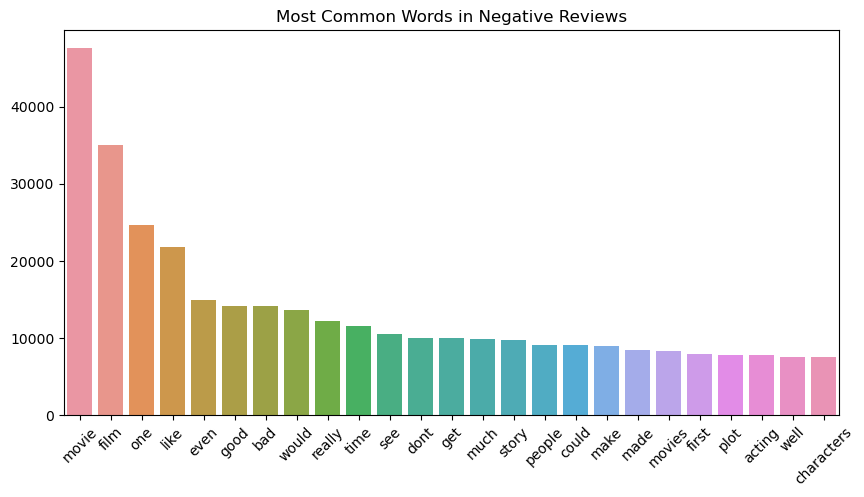

In [100]:
#most common tokens for negative reviews

neg_tokens = [token for sublist in df[df['sentiment'] == 'negative']['tokens'] for token in sublist] #flatten all token lists to one list

word_freq_neg = Counter(neg_tokens)

most_common_neg_words = word_freq_neg.most_common(25)

neg_words, neg_counts = zip(*most_common_neg_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(neg_words), y=list(neg_counts))
plt.title('Most Common Words in Negative Reviews')
plt.xticks(rotation=45)
plt.show()